In [1]:
import os
import numpy as np
import pandas as pd


In [2]:
base_dir = '..\\..\\Bases\\'
os.chdir(base_dir)
os.getcwd()

'G:\\Users\\johns\\Desktop\\TCC\\MPAlugueisLisboa\\Bases'

In [3]:
path_final =  'Imoveis\\BaseFinalv2.csv'
df_final = pd.read_csv(path_final, sep=';', decimal=',', encoding='utf-8',quotechar='"')
df_final.head(1)

,RowId,RowId.1,Id_do_imovel,Url_da_Pagina_do_imovel,Url_do_Imovel,Preco,Tipo_de_Imovel,Valor_Area_util_do_imovel,Numero_Andar_do_imovel,Indicador_de_Elevador,...,Distancia_dirigindo_de_Lisboa_Portugal,Distancia_dirigindo_de_Porto_Portugal,Clima_Ranking,Ranking_Geral,Ranking_Regional,Faixa_Area_util,Faixa_fotos,faixa_area_construida,faixa_preco,geometry
0,0,0,30365582,https://www.idealista.pt/arrendar-casas/aveiro...,/imovel/30365582/,400.0,T0,50,0,sem elevador,...,218.6,56.6,18,31.0,4,51-75,10-20,51-75,176-395,POINT (40.8374358 -8.6551784)


In [4]:
# Separando as colunas em numéricas e categóricas

numeric_cols = df_final.select_dtypes(include=[np.number]).columns.tolist()
object_cols = df_final.select_dtypes(include=['object']).columns.tolist()
target = 'Preco'

In [5]:
lst_vars_remove = ['Nivel_de_eficiencia_Energetica',                       
'Endereco_Municipio',
'geometry',
'Url_da_Pagina_do_imovel',
'Url_do_Imovel',              
'Tipo_de_Imovel',
'Numero_de_recomendacoes_recebidas',
'Nome_do_proprietario_ou_corretor',
'ad_recommendationId',
'Nome_Regiao',
'Nome_Cidade',
'faixa_preco']
for var in lst_vars_remove:
    print(var)
    object_cols.remove(var)

Nivel_de_eficiencia_Energetica
Endereco_Municipio
geometry
Url_da_Pagina_do_imovel
Url_do_Imovel
Tipo_de_Imovel
Numero_de_recomendacoes_recebidas
Nome_do_proprietario_ou_corretor
ad_recommendationId
Nome_Regiao
Nome_Cidade
faixa_preco


In [6]:
numeric_cols.remove('RowId')
numeric_cols.remove('RowId.1')
numeric_cols.remove('Id_do_imovel')
numeric_cols.remove('Preco')  # Removendo a coluna 'Preco' dos dados de entrada
numeric_cols.remove('Id_do_proprietario')   
numeric_cols.remove('Preco_por_metro_quadrado') # Removendo a coluna 'Preco_por_metro_quadrado' dos dados de entrada
numeric_cols.remove('Tipo_de_origem_de_anuncio_recomendada')



In [7]:
features = object_cols + numeric_cols
key_vars = ['Id_do_imovel']

In [8]:
# Separamos o dataframe em features (X) e target (y)
target = 'Preco'


X = df_final[features + [target] + key_vars]
y = df_final[target]

In [9]:
# Dividindo os dados em treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)


In [10]:
X.columns


Index(['Indicador_de_Elevador', 'Distrito_do_imovel',
       'Tipo_de_Certificacao_Energetica', 'Faixa_Area_util', 'Faixa_fotos',
       'faixa_area_construida', 'Valor_Area_util_do_imovel',
       'Numero_Andar_do_imovel', 'Latitude_imovel', 'Longitude_imovel',
       'Tipo_de_Construcao', 'Numero_de_Banheiros', 'Possui_Jardim',
       'Possui_Elevador', 'Possui_Estacionamento', 'Possui_Piscina',
       'Possui_Terraco', 'Numero_de_Quartos',
       'Indicador_Anuncio_possui_planta_baixa', 'Numero_de_fotos_do_anuncio',
       'Numero_de_videos_do_anuncio', 'Tipo_de_Operacao',
       'Tipo_de_proprietario', 'Numero_Faixa_Etaria_0-14',
       'Numero_Faixa_Etaria_15-64', 'Numero_Faixa_Etaria_>65',
       'Percentual_Faixa_Etaria_0-14', 'Percentual_Faixa_Etaria_15-64',
       'Percentual_Faixa_Etaria_>65', 'Densidade_populacional_por_Km',
       'Densidade_populacional_Estrangeiros',
       'Quantidade_Hospitais_(Particulares_e_Publicos)',
       'Quantidade_Farmacias', 'Quantidade_Constr

# Instalando o Pycaret no Colab
Vamos instalar a versão completa pycaret de acordo com as instruções na installation page

In [9]:
!pip install pycaret[full]==3.0.1

In [11]:
# importando todas as funções do módulo classification da biblioteca pycaret
from pycaret.classification import *
from pycaret.regression import *

In [12]:
# import RegressionExperiment and init the class
from pycaret.regression import RegressionExperiment
exp = RegressionExperiment()

In [13]:
# init setup on exp
#exp.setup(df_final, target = 'Preco', session_id = 123)
exp.exp_setup = setup(data=X,target=target,feature_selection=False, categorical_features=object_cols,
                      ignore_features=key_vars,numeric_features=numeric_cols)

,Description,Value
0,Session id,2535
1,Target,Preco
2,Target type,Regression
3,Original data shape,"(6341, 54)"
4,Transformed data shape,"(6341, 95)"
5,Transformed train set shape,"(4438, 95)"
6,Transformed test set shape,"(1903, 95)"
7,Ignore features,1
8,Numeric features,46
9,Categorical features,6


In [12]:
#setup(X, target = 'Preco')

In [14]:
# compare baseline models
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,137.7486,35147.6659,187.3878,0.7672,0.1856,0.1486,1.5320
lightgbm,Light Gradient Boosting Machine,137.5039,35457.5834,188.1374,0.7650,0.1874,0.1488,0.7750
xgboost,Extreme Gradient Boosting,142.0984,38194.7465,195.2006,0.7469,0.1950,0.1538,0.8270
rf,Random Forest Regressor,143.0395,38879.8943,197.0204,0.7424,0.1969,0.1566,1.5080
gbr,Gradient Boosting Regressor,149.1000,40338.1024,200.6618,0.7329,0.1992,0.1615,0.8140
et,Extra Trees Regressor,161.3316,49935.6488,223.2739,0.6689,0.2209,0.1756,1.1780
ridge,Ridge Regression,173.6030,51631.9491,227.0694,0.6583,0.2561,0.1938,0.6200
br,Bayesian Ridge,173.3832,51655.6577,227.1116,0.6581,0.2494,0.1931,0.6650
lr,Linear Regression,173.7432,51687.3465,227.1916,0.6579,0.2568,0.1940,1.1620
llar,Lasso Least Angle Regression,173.5908,51926.3705,227.7023,0.6563,0.2490,0.1934,0.6730


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [15]:
get_config('pipeline')

Pipeline(memory=FastMemory(location=C:\Users\johns\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['Valor_Area_util_do_imovel',
                                             'Numero_Andar_do_imovel',
                                             'Latitude_imovel',
                                             'Longitude_imovel',
                                             'Tipo_de_Construcao',
                                             'Numero_de_Banheiros',
                                             'Possui_Jardim', 'Possui_Elevador',
                                             'Possui_Estacionamento',
                                             'Possui_Piscina', 'Possui_...
                                             'Faixa_Area_util', 'Faixa_fotos',
                                             'faixa_area_construida'],
                                    transformer=OneHotEncoder(cols=['Indicador_de_Elevador',
                                                                    'Distrito_do_imovel',
                                                                    'Tipo_de_Certificacao_Energetica',
                                                                    'Faixa_Area_util',
                                                                    'Faixa_fotos',
                                                                    'faixa_area_construida'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames()))])

In [23]:
compare_models_results = pull()




In [26]:
compare_models_results.to_excel('compare_models_results.xlsx')


Vendo o melhor modelo encontrado:

O melhor modelo encontrado foi catboost.

In [16]:
catboost = create_model('catboost', fold=5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,136.5000,34768.8693,186.4641,0.7764,0.1836,0.1465
1,138.2616,35398.3377,188.1445,0.7586,0.1872,0.1491
2,138.3752,36692.8897,191.5539,0.7696,0.1882,0.1483
3,139.6110,35555.4914,188.5616,0.7678,0.1874,0.1513
4,138.9862,35556.1992,188.5635,0.7500,0.1899,0.1523
Mean,138.3468,35594.3575,188.6575,0.7645,0.1872,0.1495
Std,1.0417,621.2237,1.6420,0.0092,0.0020,0.0021


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [17]:
catboost

# Otimização de Hiperparâmetros

In [17]:
catboost_rf = tune_model(catboost, fold=5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,142.2476,36873.7969,192.0255,0.7629,0.1923,0.1541
1,142.9973,37766.3107,194.3356,0.7425,0.1942,0.1552
2,145.3571,40011.3503,200.0284,0.7488,0.1964,0.1565
3,144.4245,37676.2316,194.1037,0.7540,0.1942,0.1574
4,141.0283,36026.5223,189.8065,0.7467,0.1930,0.1552
Mean,143.2109,37670.8424,194.0599,0.7510,0.1940,0.1557
Std,1.5373,1328.6226,3.4038,0.0070,0.0014,0.0011


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


Nâo conseguimos melhorar o modelo original. Vamos tentar aumentar a quantidade de iterações para 30.

In [45]:
catboost_rf = tune_model(catboost, fold=5, optimize='R2', n_iter=30)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,133.6623,35357.0406,188.0347,0.7521,0.1911,0.1483
1,146.1428,38197.2723,195.4412,0.7639,0.1929,0.1547
2,141.7821,38250.5019,195.5774,0.7538,0.1905,0.1504
3,141.4502,37100.0786,192.6138,0.7785,0.1915,0.1542
4,140.0734,36740.0597,191.6770,0.7419,0.1933,0.1538
Mean,140.6221,37128.9906,192.6688,0.7581,0.1918,0.1523
Std,4.0311,1066.8574,2.7788,0.0124,0.0011,0.0025


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


## Analizando o Modelo e as Métricas

# Plot ID for Regression Models
/*
+-----------------------------+-------------+
|            Name             |    Plot     |
+-----------------------------+-------------+
| Residuals Plot              | ‘residuals’ |
| Prediction Error Plot       | ‘error’     |
| Cooks Distance Plot         | ‘cooks’     |
| Recursive Feature Selection | ‘rfe’       |
| Learning Curve              | ‘learning’  |
| Validation Curve            | ‘vc’        |
| Manifold Learning           | ‘manifold’  |
| Feature Importance          | ‘feature’   |
| Model Hyperparameter        | ‘parameter’ |
+-----------------------------+-------------+
*/

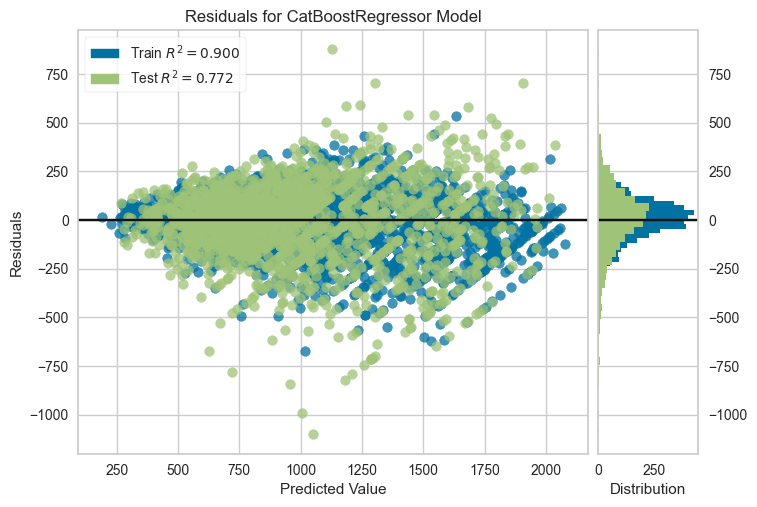

In [18]:
plot_model(catboost)

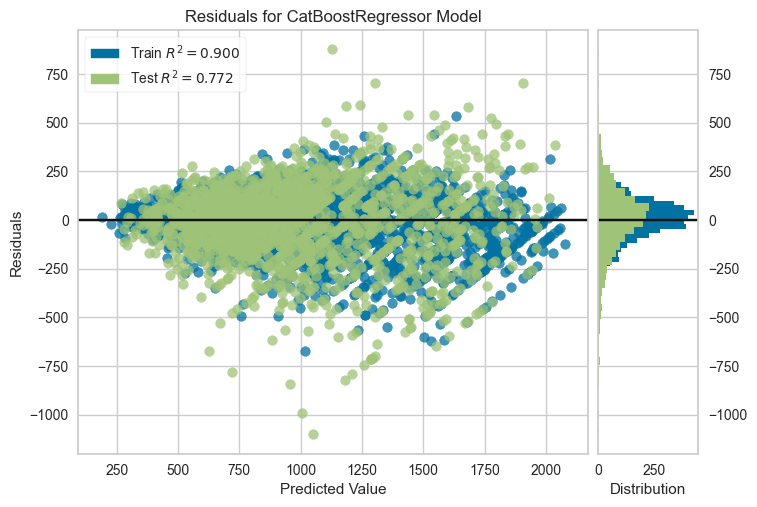

In [19]:
plot_model(catboost,plot='residuals')

Feature Importance

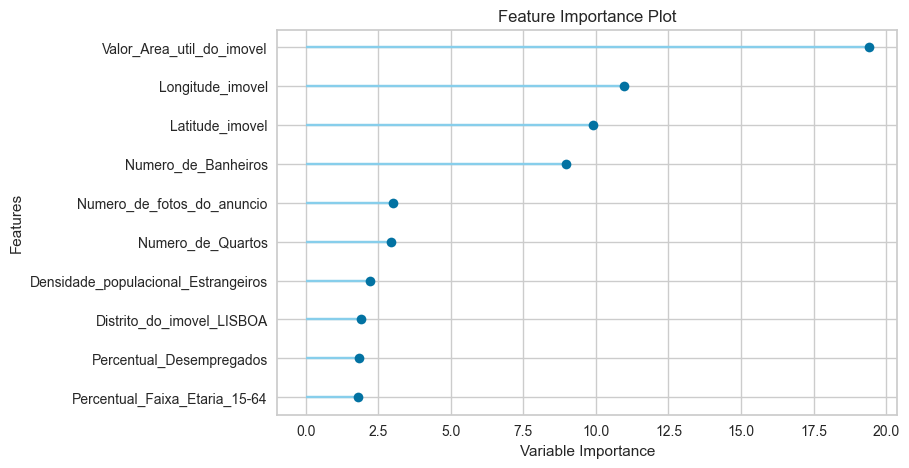

In [20]:
plot_model(catboost, plot='feature')

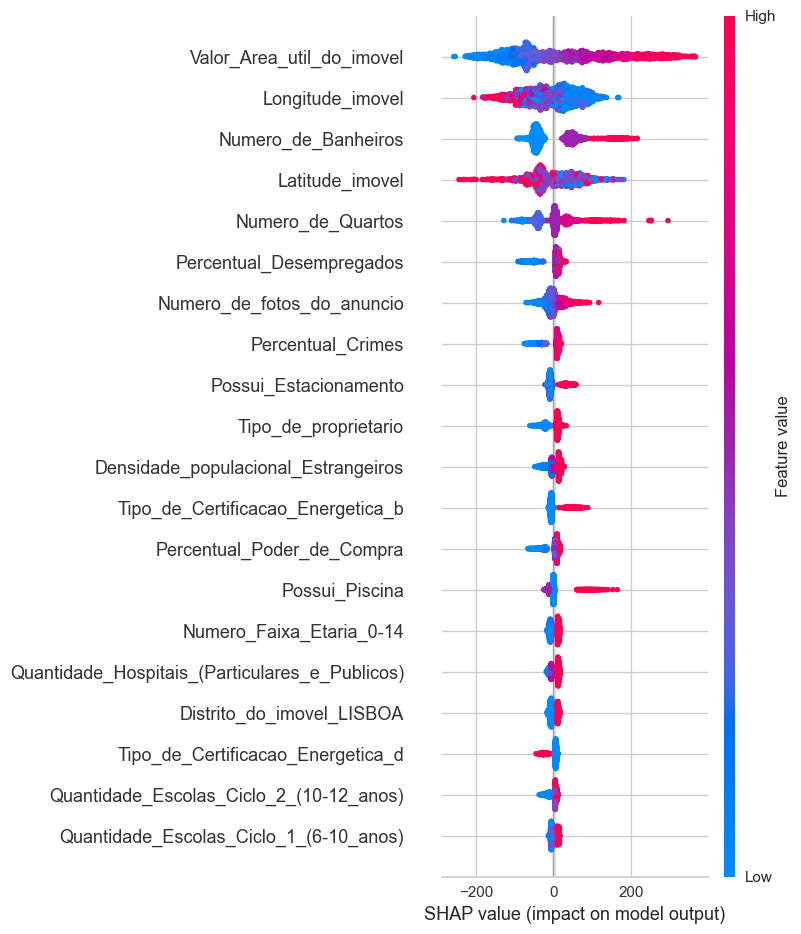

In [21]:
interpret_model(catboost)

Valor_area_util_do_imovel é a variável que mais influencia no valor do arrendamento, 
seguido por Longitude, Latitude e Numero de banheiros. 


In [22]:
# base de teste (oot)
X_test = get_config('X_test')
X_test.head()

,Indicador_de_Elevador,Distrito_do_imovel,Tipo_de_Certificacao_Energetica,Faixa_Area_util,Faixa_fotos,faixa_area_construida,Valor_Area_util_do_imovel,Numero_Andar_do_imovel,Latitude_imovel,Longitude_imovel,...,Percentual_Poder_de_Compra,Percentual_Crimes,Quantidade_Bancos,Latitude_Municipio,Longitude_Municipio,Distancia_dirigindo_de_Lisboa_Portugal,Distancia_dirigindo_de_Porto_Portugal,Clima_Ranking,Ranking_Geral,Ranking_Regional
4189,com elevador,PORTO,desconhecido,51-75,0-10,51-75,50,0,41.184654,-8.610150,...,154.000000,56.200001,184,41.149452,-8.610788,274.799988,0.000000,15,6.0,2
1604,Não Informado,LISBOA,c,76-100,20-30,76-100,90,0,38.696301,-9.373089,...,205.600006,49.700001,460,38.707752,-9.136592,0.000000,274.799988,26,1.0,1
5665,com elevador,PORTO,desconhecido,51-75,0-10,51-75,54,2,41.151997,-8.609227,...,154.000000,56.200001,184,41.149452,-8.610788,274.799988,0.000000,15,6.0,2
6092,Não Informado,SETUBAL,c,101-125,10-20,101-125,114,0,38.627392,-8.912430,...,108.000000,34.299999,31,38.524178,-8.893234,29.400000,292.500000,28,23.0,11
1098,sem elevador,FARO,desconhecido,51-75,10-20,51-75,60,0,37.088932,-8.109572,...,130.600006,46.900002,29,37.016273,-7.935177,215.500000,462.600006,22,44.0,2


In [23]:
predict_model(catboost)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,138.9062,36480.8993,190.9997,0.7716,0.1877,0.1483


,Indicador_de_Elevador,Distrito_do_imovel,Tipo_de_Certificacao_Energetica,Faixa_Area_util,Faixa_fotos,faixa_area_construida,Valor_Area_util_do_imovel,Numero_Andar_do_imovel,Latitude_imovel,Longitude_imovel,...,Quantidade_Bancos,Latitude_Municipio,Longitude_Municipio,Distancia_dirigindo_de_Lisboa_Portugal,Distancia_dirigindo_de_Porto_Portugal,Clima_Ranking,Ranking_Geral,Ranking_Regional,Preco,prediction_label
4189,com elevador,PORTO,desconhecido,51-75,0-10,51-75,50,0,41.184654,-8.610150,...,184,41.149452,-8.610788,274.799988,0.000000,15,6.0,2,600.0,639.004605
1604,Não Informado,LISBOA,c,76-100,20-30,76-100,90,0,38.696301,-9.373089,...,460,38.707752,-9.136592,0.000000,274.799988,26,1.0,1,1100.0,1349.885007
5665,com elevador,PORTO,desconhecido,51-75,0-10,51-75,54,2,41.151997,-8.609227,...,184,41.149452,-8.610788,274.799988,0.000000,15,6.0,2,680.0,786.249978
6092,Não Informado,SETUBAL,c,101-125,10-20,101-125,114,0,38.627392,-8.912430,...,31,38.524178,-8.893234,29.400000,292.500000,28,23.0,11,675.0,801.878148
1098,sem elevador,FARO,desconhecido,51-75,10-20,51-75,60,0,37.088932,-8.109572,...,29,37.016273,-7.935177,215.500000,462.600006,22,44.0,2,988.0,776.474366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1948,sem elevador,LISBOA,e,101-125,0-10,101-125,120,3,38.703724,-9.188838,...,460,38.707752,-9.136592,0.000000,274.799988,26,1.0,1,1100.0,1020.626998
4176,sem elevador,PORTO,desconhecido,76-100,10-20,76-100,75,1,41.152340,-8.612059,...,184,41.149452,-8.610788,274.799988,0.000000,15,6.0,2,850.0,891.077717
4496,com elevador,PORTO,c,126-150,30-40,126-150,130,4,41.127342,-8.623725,...,184,41.149452,-8.610788,274.799988,0.000000,15,6.0,2,900.0,1438.447878
3763,sem elevador,LISBOA,c,26-50,10-20,26-50,40,0,38.715157,-9.133769,...,460,38.707752,-9.136592,0.000000,274.799988,26,1.0,1,700.0,753.703226


In [24]:
# Finalize model
catboost_final = finalize_model(catboost)

In [25]:
catboost_final

Pipeline(memory=FastMemory(location=C:\Users\johns\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['Valor_Area_util_do_imovel',
                                             'Numero_Andar_do_imovel',
                                             'Latitude_imovel',
                                             'Longitude_imovel',
                                             'Tipo_de_Construcao',
                                             'Numero_de_Banheiros',
                                             'Possui_Jardim', 'Possui_Elevador',
                                             'Possui_Estacionamento',
                                             'Possui_Piscina', 'Possui_...
                                    transformer=OneHotEncoder(cols=['Indicador_de_Elevador',
                                                                    'Distrito_do_imovel',
                                                                    'Tipo_de_Certificacao_Energetica',
                                                                    'Faixa_Area_util',
                                                                    'Faixa_fotos',
                                                                    'faixa_area_construida'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames())),
                ('actual_estimator',
                 <catboost.core.CatBoostRegressor object at 0x00000271612A9570>)])

O PyCaret é uma excelente ferramenta para prototipagem ágil destinada a analistas experientes.

Contudo, ele apresenta algumas restrições. Neste banco de dados específico, encontramos problemas ao tentar calcular os 
valores Shapley do modelo devido a um bug na biblioteca. Assim, seria imprescindível recorrer a bibliotecas mais 
convencionais para realizar as estimativas.